![matplotlib](http://matplotlib.org/_static/logo2.svg)
# <span style="color:green">Session 8 - Advanced Visualization</span>

## Today's Agenda
Today we will be focusing on plotting and on how to produce __`publication-ready`__ plots
- Modifying your `matplotlibrc` file
- Matplotlib Style sheets
- Seaborn
- Bokeh

# <span style="color:blue">Modifying your</span> <span style="color:red">matplotlibrc</span> <span style="color:blue">file</span>
Matplotlib uses a _special_ file called `matplotlibrc` file.
This file is usually in your __~/.matplotlib/matplotlibrc__ directory

You can check the location of this file by typing:

In [1]:
# Importing modules
%matplotlib inline
import matplotlib

# Printing out `fname` for `matplotlibrc`
matplotlib.matplotlib_fname()

'/Users/Dax/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

You can also __edit__ the different parameters of the `matplotlibrc` file.

In [3]:
# List of possible values to be changed
import matplotlib as mpl
matplotlib.rcParams
print('Linewidth: {0}   Color: {1}'.format(
                                    mpl.rcParams['lines.linewidth'],
                                    mpl.rcParams['lines.color']))

Linewidth: 1.5   Color: C0


In [4]:
# Changing line properties
mpl.rc('lines', linewidth=10, color='g')
print('Linewidth: {0}   Color: {1}'.format(
                                    mpl.rcParams['lines.linewidth'],
                                    mpl.rcParams['lines.color']))

Linewidth: 10.0   Color: g


# <span style="color:blue">Matplotlib Style sheets</span>

Newer versions of matplotlib offer the option to setup a __style sheet__.
For example, one can have a plot look like taken from `ggplot` or `SuperMongo`.

In [5]:
def plotting(stylename='classic'):
    # Defining data
    x = np.arange(0,10)
    y = np.random.randint(20,30,x.size)
    # Defining style sheet
    try:
        plt.style.use(stylename)
    except IOError:
        msg = '{0} not found'.format(stylename)
        raise IOError(msg)
    # Plotting
    plt.clf()
    plt.plot(x,y,'-ro', label=stylename)
    plt.xlabel('X label')
    plt.ylabel('X label')
    plt.legend(loc=1)
    plt.title('Plot using "{0}" Style'.format(stylename), fontsize=20 )
    plt.show()

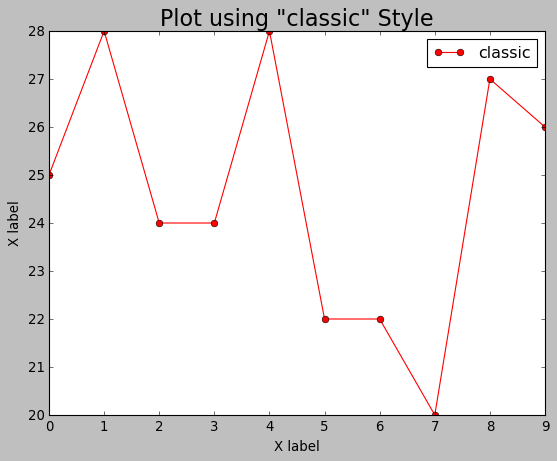

In [6]:
plotting(stylename='classic')

Now with a new __style sheet__

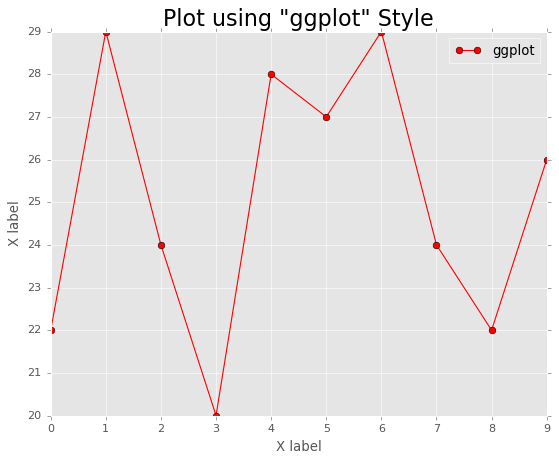

In [7]:
plotting(stylename='ggplot')

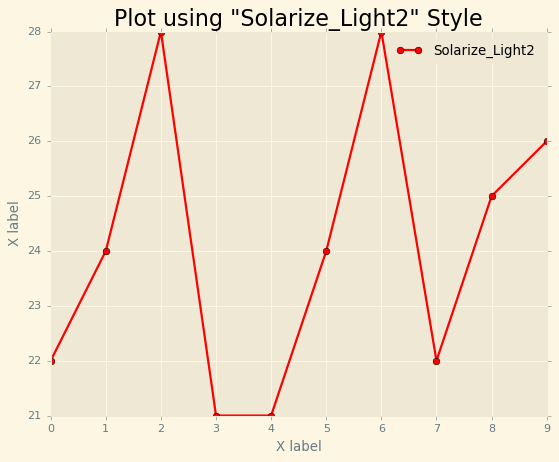

No handles with labels found to put in legend.


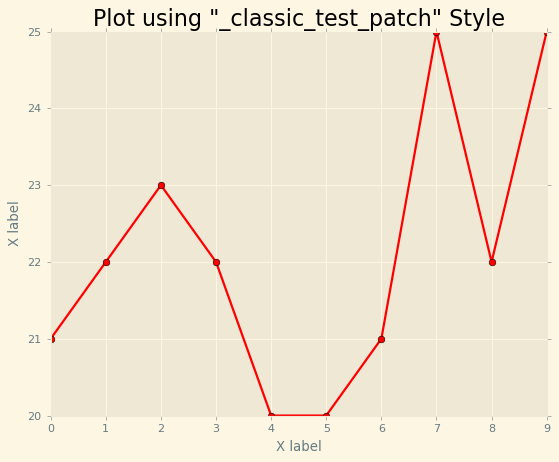

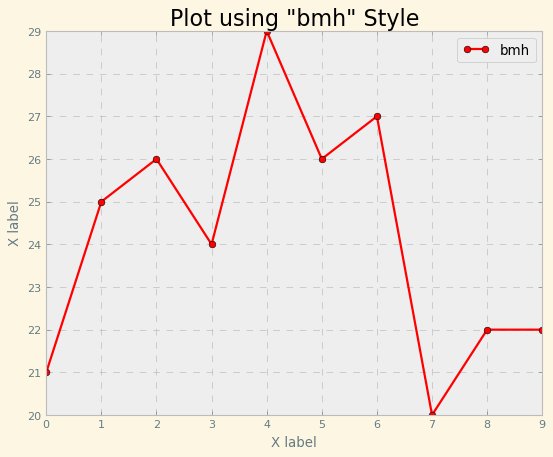

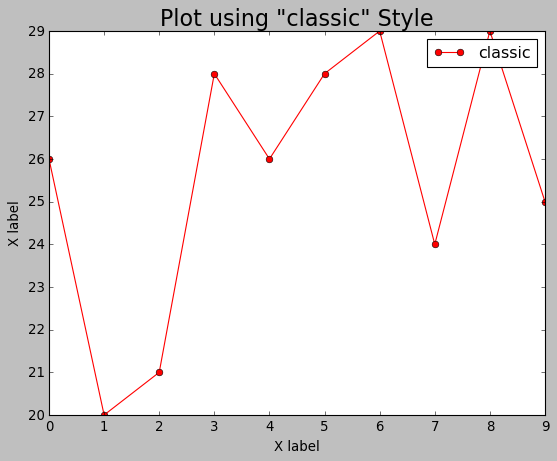

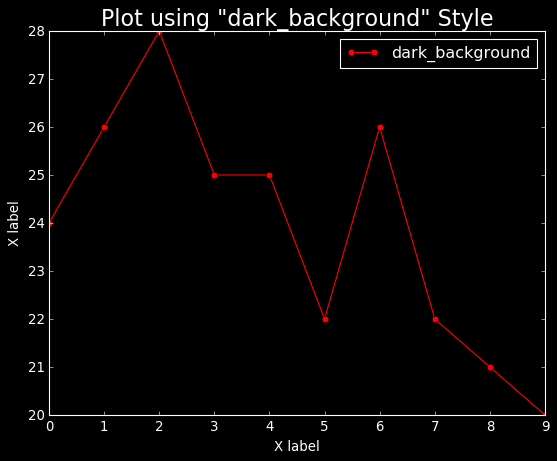

In [8]:
for style in plt.style.available[0:5]:
    plotting(stylename=style)

To get a list of the all the __styles available__:

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

- A nice website to look at the different style sheet is: [https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

# <span style="color:red">Seaborn</span>
- Website: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

Seaborn is visualization library based on matplotlib. It provides high-level interface for drawing attractive statistical graphics.

Some of the data here was taken from: [http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)

## The Data

We'll be using the [ UCI "Auto MPG"](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) data for the purpose of this module.

We'll be using pandas along with `Seaborn`.

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Reading in the data that we'll be using:

In [11]:
# Names of columns
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]

# Reading in ASCII file with motor data
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)

# Creating new column named `maker`
df['maker'] = df.car_name.map(lambda x: x.split()[0])

# Assiging Continents corresponding values
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})

# Dropping `NaN` values
df=df.applymap(lambda x: np.nan if x == '?' else x).dropna()

# Changing the data type of `horsepower`
df['horsepower'] = df.horsepower.astype(float)


df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,ford


### Factorplot and FacetGrid

/Users/Dax/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


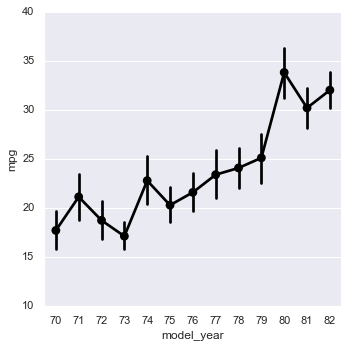

In [15]:
sns.set_context('notebook')
sns.factorplot(data=df, x="model_year", y="mpg",color='black')

We can start off by visualizing '`model_year`' vs '`mpg`' for each type of '`origin`' class.
<br> We can do this by using the __factorplot__ command:

/Users/Dax/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


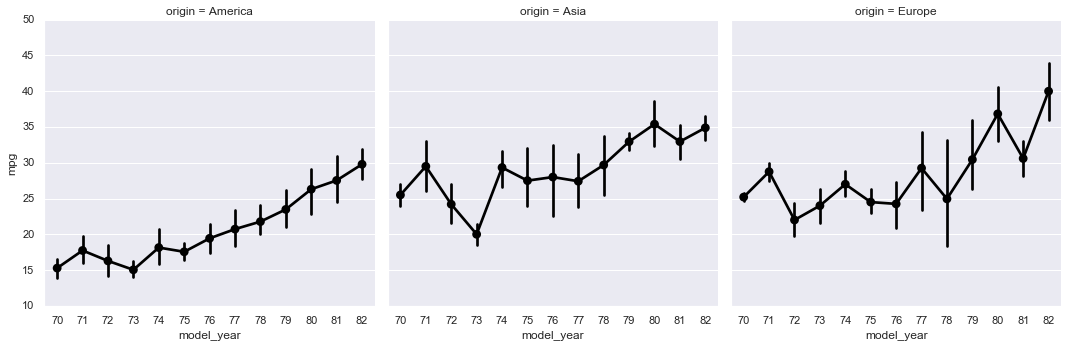

In [16]:
sns.factorplot(data=df, x="model_year", y="mpg", col="origin",color='black')

You can easily change the type of graph that you're plotting

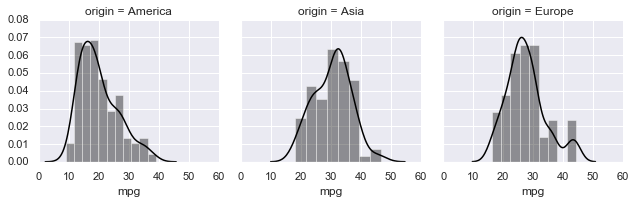

In [17]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.distplot, "mpg",color='black')

Or look at a scatter plot of the data

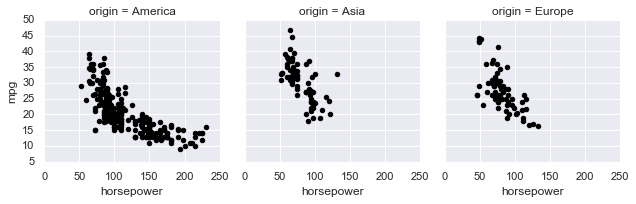

In [18]:
g = sns.FacetGrid(df, col="origin")
g.map(plt.scatter, "horsepower", "mpg",color='black')

You can easily compute and plot a regression of the data

(0.0, 60.0)

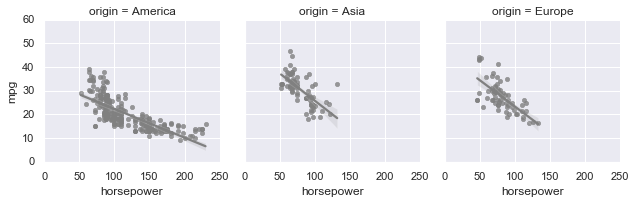

In [21]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.regplot, "horsepower", "mpg",color='grey')
plt.xlim(0, 250)
plt.ylim(0, 60)

Let's say you want to visualize the "Kernel Density Estimation" for each type

(0.0, 60.0)

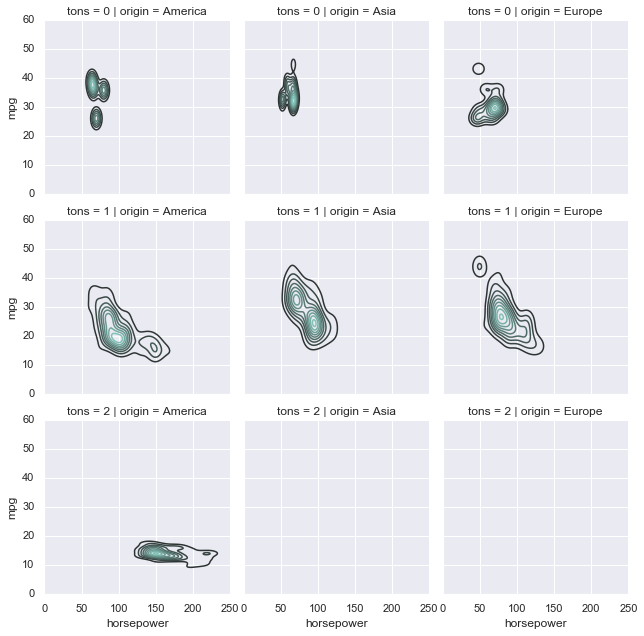

In [22]:
# Define new variable `tons`
df['tons'] = (df.weight/2000).astype(int)

# Create grid to plot your data
g = sns.FacetGrid(df, col="origin", row="tons")

# 1) Specify type of function
# 2) Specify 'x' and 'y' for each plot
g.map(sns.kdeplot, "horsepower", "mpg")

# Define the x- and y-limits for each subplot
plt.xlim(0, 250)
plt.ylim(0, 60)

## pairplot and PairGrid

These functions allow you to plot _pairwise relations_ in a dataset.
<br>Let's say we want to plot the relation between `mpg`, `horsepower`, `weight`, and `origin`.
<br>And we also want to separate them based on the `origin`.

__No types__

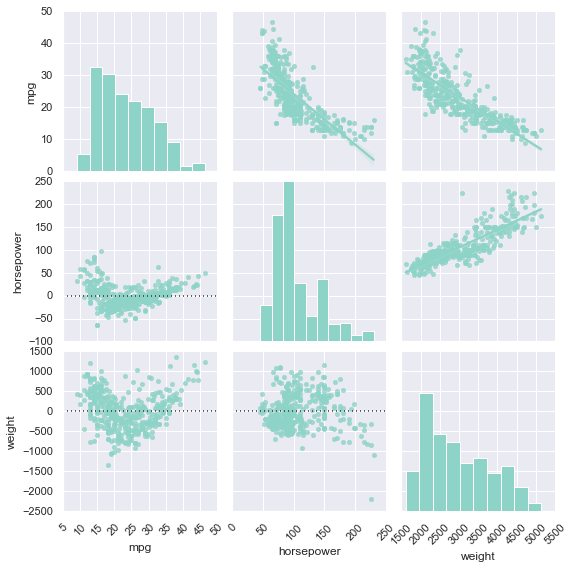

In [23]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]])
g.map_upper(sns.regplot)
g.map_lower(sns.residplot)
g.map_diag(plt.hist)
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
g.set(alpha=0.5)

We can specify the types of `origin`

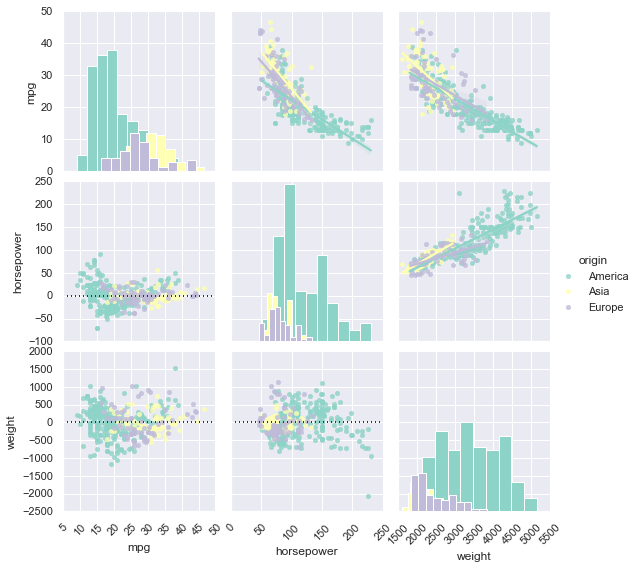

In [24]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin")
g.map_upper(sns.regplot)
g.map_lower(sns.residplot)
g.map_diag(plt.hist)
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()
g.set(alpha=0.5)

Or `maker`

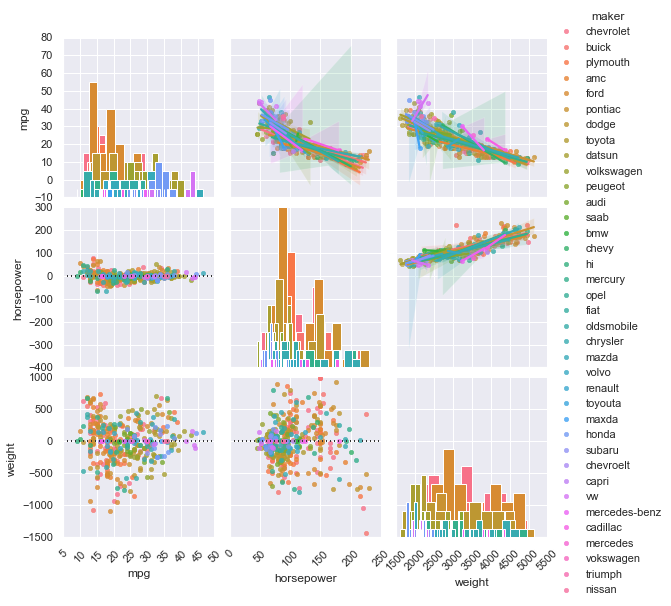

In [25]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin","maker"]], hue="maker")
g.map_upper(sns.regplot)
g.map_lower(sns.residplot)
g.map_diag(plt.hist)
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()
g.set(alpha=0.5)

You can see, you have some freedom when it comes to what you want to plot~

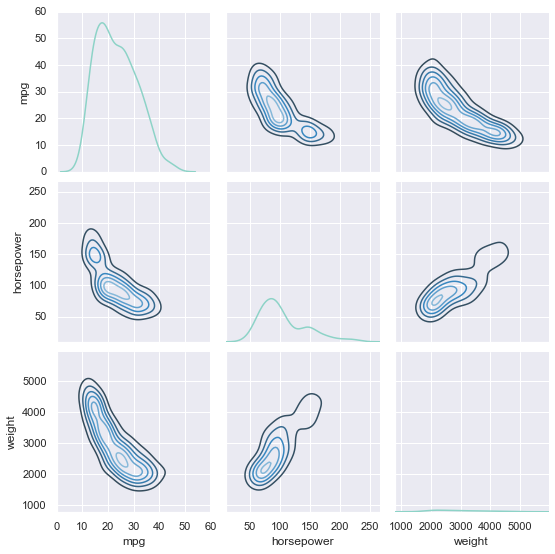

In [26]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## jointplot and JointGrid

You can also visualize 2D-data in different ways:

### KDE and Histograms
You can estimate the [Pearson correlation factor](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), along with the [p-value](https://en.wikipedia.org/wiki/P-value) of a linear fitting.

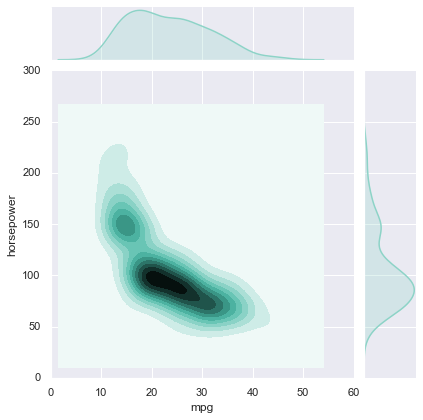

In [27]:
sns.jointplot("mpg", "horsepower", data=df, kind='kde')

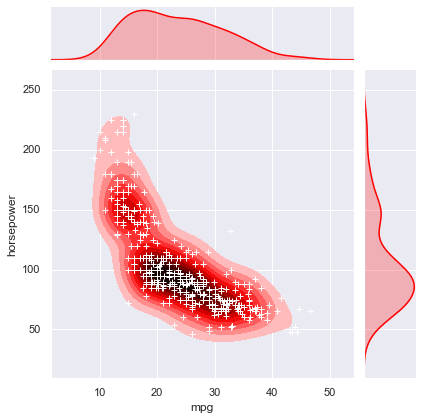

In [28]:
g = sns.jointplot(x="mpg", y="horsepower", data=df, kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)

Or show the linear regression of data

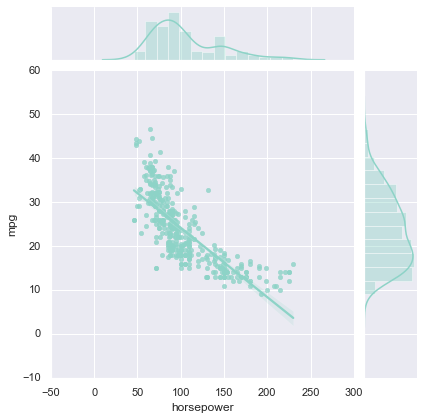

In [29]:
sns.jointplot("horsepower", "mpg", data=df, kind="reg")

Or a 2nd-order fitting to the data:

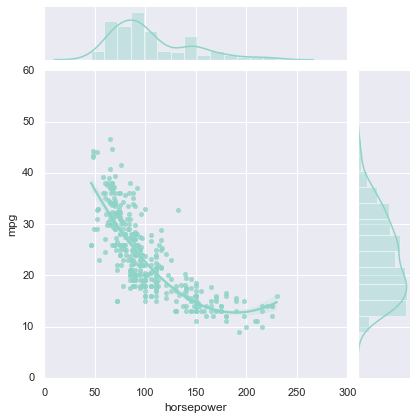

In [30]:
g = sns.JointGrid(x="horsepower", y="mpg", data=df)
g.plot_joint(sns.regplot, order=2)
g.plot_marginals(sns.distplot)

You can also plot __2D-Histograms__

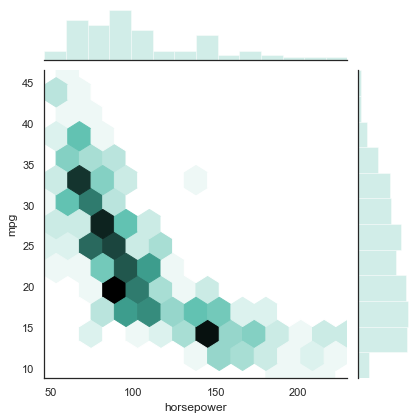

In [31]:
with sns.axes_style("white"):
    sns.jointplot(x="horsepower", y="mpg", data=df, kind="hex");

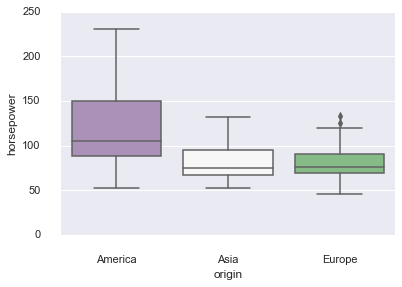

In [32]:
sns.boxplot(x="origin", y="horsepower",data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

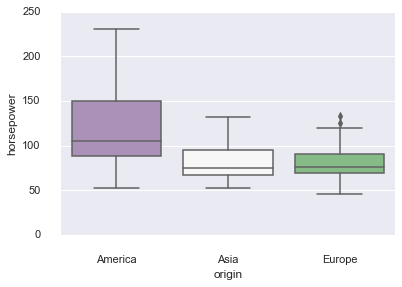

In [33]:
sns.boxplot(x="origin", y="horsepower", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

### tsplot
Plot one or more timeseries with flexible representation of uncertainty.

In [34]:
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                unit="subject", condition="ROI",
                data=gammas)

AttributeError: module 'seaborn' has no attribute 'tsplot'

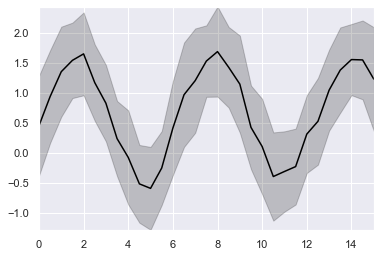

In [39]:
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)

#unfortunately tsplot has been depreciated but we can recreate something similar:

def tsplot(ax, x,data,**kw):
    est = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

fig=plt.figure()
ax=fig.add_subplot(111)
tsplot(ax, x,data,color='black')



### Scatterplot

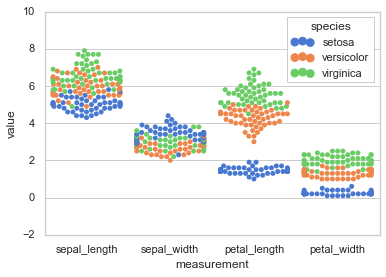

In [41]:
sns.set(style="whitegrid", palette="muted")
# Load the Dataset
iris = sns.load_dataset("iris")
# Create a boxplot 
iris = pd.melt(iris, "species", var_name="measurement")
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

### Heatmaps

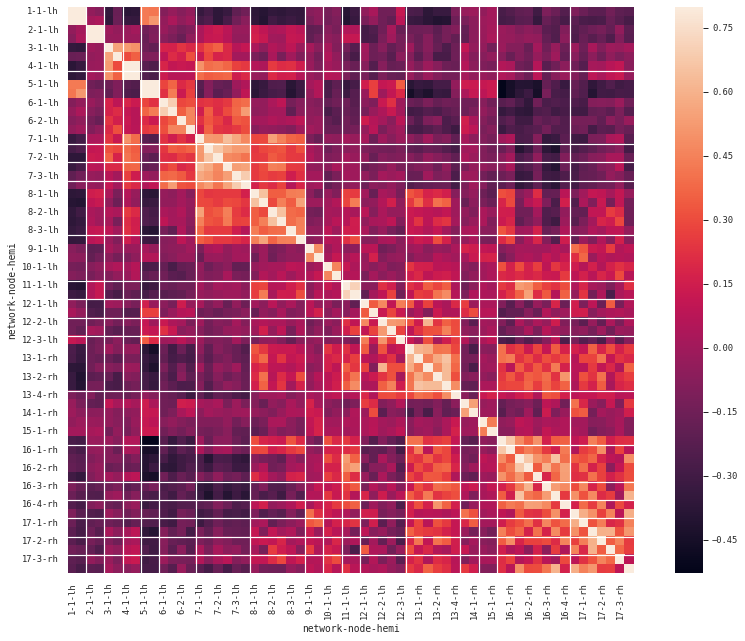

In [42]:
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

# See also
- [http://seaborn.pydata.org/generated/seaborn.FacetGrid.html](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
- [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)
- [https://github.com/InsightDataLabs/ipython-notebooks/blob/master/seaborn.ipynb](https://github.com/InsightDataLabs/ipython-notebooks/blob/master/seaborn.ipynb)

# Next Session
- Open Hack Session
    - Make sure to bring some ideas or problems, and we will try to answer them or help you out with them.